In [105]:
!pip install scikit-plot

#Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [143]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchsummary import summary
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import itertools
from sklearn.metrics import confusion_matrix
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import cross_val_score
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import scikitplot as skplt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from functools import partial
import random
from concurrent import futures
from sklearn.metrics.pairwise import euclidean_distances
import tensorflow as tf
from matplotlib import pyplot
from pylab import *
from keras.preprocessing.image import ImageDataGenerator
from numpy import save
from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

#READ DATA

In [144]:
from tables.table import Column
data = pd.read_csv("/content/drive/MyDrive/Pattern Recognition/Pima-Indians-Diabetes-Dataset-master/diabetes.csv" ,encoding = "ISO-8859-1")
#data = data.rename(columns = {"outcome":"target"})
data.head(5)
#data.tail(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5288227681000391365, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5288227681000391365, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5288227681000391365, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5288227681000391365, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5288227681000391365, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5288227681000391365, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5288227681000391365, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5288227681000391365, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5288227681000391365, *[[['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'SkinThickness'], ['SkinThickness', 'Insulin']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5288227681000391365, *['Insulin', 'Pregnancies', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5288227681000391365, *['Insulin', 'Glucose', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5288227681000391365, *['Insulin', 'BloodPressure', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5288227681000391365 = autoviz.get_df('df_5288227681000391365')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5288227681000391365, *['Insulin', 'SkinThickness', None], **{})
chart

#which columns has a missing value?

In [145]:
miss_count=data.isnull().sum()
print('Missing: %d' % sum(miss_count))
print(miss_count)
print(data.shape)

Missing: 0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
(768, 9)


# Histogram chart

<Axes: title={'center': 'Histogram of the data variable'}, ylabel='Frequency'>

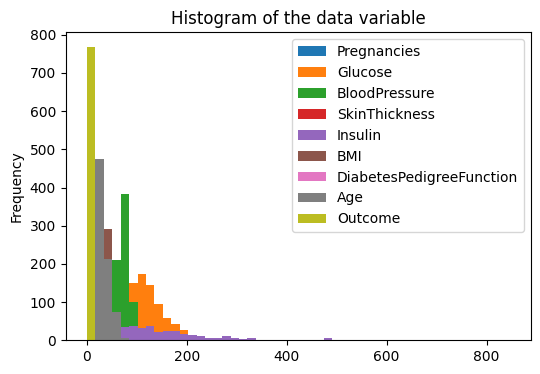

In [146]:
data.plot.hist(bins=50, figsize=(6,4), title = "Histogram of the data variable")

#X,Y

In [147]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

#Normalization Min Max

In [148]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(x)
data_std = std_scale.transform(x)

minmax_scale = preprocessing.MinMaxScaler().fit(x)
data_minmax = minmax_scale.transform(x)

df = pd.DataFrame(data_minmax, columns= ['Pregnancies','Glucose','BloodPressure',
                                            'SkinThickness','Insulin','BMI',
                                            'DiabetesPedigreeFunction','Age'])
df.head(6)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000


In [149]:
print('Mean value of AGE {}'.format(df['Age'].mean()))
print('Min value of AGE {}'.format(df['Age'].min()))
print('Max value of AGE {}'.format(df['Age'].max()))
print('Standard deviation value of AGE {}'.format(round(df['Age'].std( ))))

Mean value of AGE 0.20401475694444446
Min value of AGE 0.0
Max value of AGE 1.0
Standard deviation value of AGE 0


#Draw a box plot on normalized data to find outliers

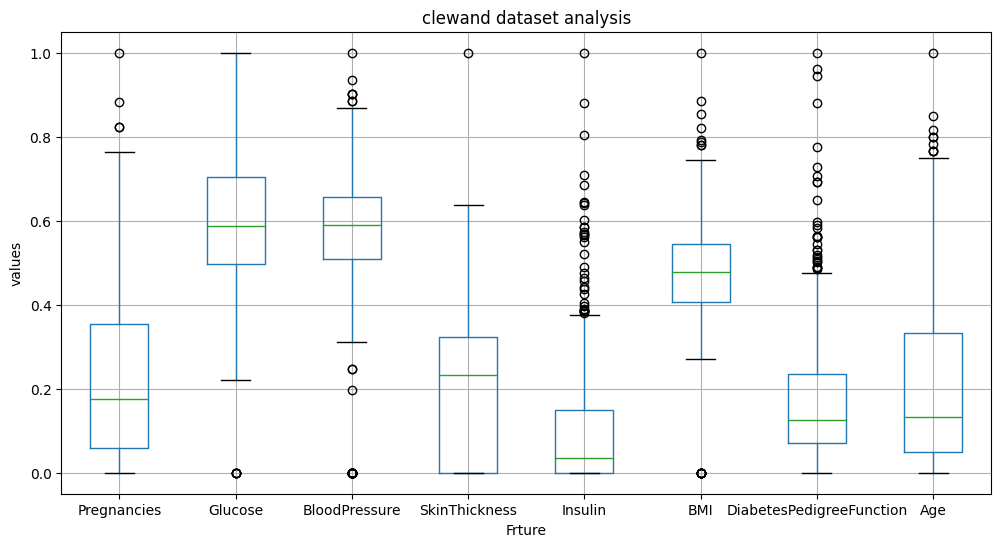

In [150]:
length_width = df[['Pregnancies','Glucose','BloodPressure',
                                            'SkinThickness','Insulin','BMI',
                                            'DiabetesPedigreeFunction','Age']] #excluding species column
length_width.boxplot(figsize=(12,6))
plt.xlabel('Frture')
plt.ylabel('values')
plt.title("clewand dataset analysis")
plt.show()

##train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
print(('Train:', len(X_train)), ('Test:', len(X_test)))

('Train:', 537) ('Test:', 231)


# 5-Fold Cross Validation

In [142]:
from sklearn.model_selection import cross_val_score

reg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(kernel='linear', probability=True)
dt = DecisionTreeClassifier()
ext = ExtraTreesClassifier(n_estimators=100, random_state=0)
rf = RandomForestClassifier(n_estimators = 1000)
gnb = GaussianNB()
#lda = LDA()

reg_cv_scores = cross_val_score(reg, df, y, cv=5)
knn_cv_scores = cross_val_score(knn, df, y, cv=5)
svm_cv_scores = cross_val_score(svm, df, y, cv=5)
dt_cv_scores = cross_val_score(dt, df, y, cv=5)
rf_cv_scores = cross_val_score(rf, df, y, cv=5)
ext_cv_scores = cross_val_score(ext, df, y, cv=5)
gnb_cv_scores = cross_val_score(gnb, df, y, cv=5)
#lda_cv_scores = cross_val_score(reg, df, y, cv=5)

print("mean LR:", mean(reg_cv_scores))
print("mean KNN:", mean(knn_cv_scores))
print("mean SVM:", mean(svm_cv_scores))
print("mean DT:", mean(dt_cv_scores))
print("mean EXT:", mean(rf_cv_scores))
print("mean RF:", mean(ext_cv_scores))
print("mean GNB:", mean(gnb_cv_scores))



mean LR: 0.7695696460402341
mean KNN: 0.7513453866395043
mean SVM: 0.7695611577964518
mean DT: 0.7058229352347001
mean EXT: 0.7657159833630421
mean RF: 0.7630676513029455
mean GNB: 0.7513368983957219


##Classifier k-Nearest Neighbors (KNN)

In [92]:

k_range = range(1 , 5)   # range for choose best K

scores = {}
scores_list = []

for k in k_range :
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))


In [91]:
print(scores_list)

[0.6883116883116883, 0.7272727272727273, 0.6753246753246753, 0.7229437229437229]


####The Best k is 2 in range of (1,10)





In [93]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
  # evaluate the performance of the KNN model
print("\KNN Classifier:")
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

\KNN Classifier:
Accuracy Score: 0.7229437229437229
Recall: 0.4875
F1-Score: 0.5492957746478874
Precision: 0.6290322580645161
Confusion Matrix:
 [[128  23]
 [ 41  39]]


##Classifier Support Vector Machines (SVC)

In [94]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', probability=True)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
# evaluate the performance of the SVM model
print("\SVM Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

\SVM Classifier:
Accuracy Score: 0.7445887445887446
Recall: 0.625
F1-Score: 0.6289308176100629
Precision: 0.6329113924050633
Confusion Matrix:
 [[122  29]
 [ 30  50]]


##Classifier Decision Tree (DTC)

In [95]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
# evaluate the performance of the DTC model
print("\DTC Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

\DTC Classifier:
Accuracy Score: 0.6883116883116883
Recall: 0.625
F1-Score: 0.5813953488372093
Precision: 0.5434782608695652
Confusion Matrix:
 [[109  42]
 [ 30  50]]


##Classifier Extra Trees (ET)

In [134]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

ExtraTree = ExtraTreesClassifier(n_estimators=100, random_state=0)
ExtraTree.fit(X_train, y_train)
y_pred = ExtraTree.predict(X_test)
# evaluate the performance of the DTC model
print("\DTC Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


\DTC Classifier:
Accuracy Score: 0.7402597402597403
Recall: 0.5875
F1-Score: 0.6103896103896105
Precision: 0.6351351351351351
Confusion Matrix:
 [[124  27]
 [ 33  47]]


##Classifier RandomForest (RF)

In [96]:
RF = RandomForestClassifier(n_estimators = 1000)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
# evaluate the performance of the RF model
print("\RF Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

\RF Classifier:
Accuracy Score: 0.7402597402597403
Recall: 0.625
F1-Score: 0.625
Precision: 0.625
Confusion Matrix:
 [[121  30]
 [ 30  50]]


##Classifier Logistic Regression (LR)



In [97]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
# evaluate the performance of the LR model
print("\LR Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

\LR Classifier:
Accuracy Score: 0.7402597402597403
Recall: 0.625
F1-Score: 0.625
Precision: 0.625
Confusion Matrix:
 [[121  30]
 [ 30  50]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Classifier GaussianNB (GNB)



In [98]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
# evaluate the performance of the GNB model
print("\GNB Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

\GNB Classifier:
Accuracy Score: 0.7445887445887446
Recall: 0.6625
F1-Score: 0.6424242424242423
Precision: 0.6235294117647059
Confusion Matrix:
 [[119  32]
 [ 27  53]]


##Classifier  (LDA)



In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA = LDA()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
# evaluate the performance of the LDA model
print("\LDA Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

\LDA Classifier:
Accuracy Score: 0.7316017316017316
Recall: 0.6125
F1-Score: 0.6125
Precision: 0.6125
Confusion Matrix:
 [[120  31]
 [ 31  49]]


## Voting  Classifier For Ensemble Classification
###(LR, SVC, DTC, KNN, RF, GNB, ET)

In [103]:
# Voting classifier
estimator = []
estimator.append(('LR',
                  LogisticRegression(solver ='lbfgs',
                                     multi_class ='multinomial',
                                     max_iter = 200)))
estimator.append(('SVC', SVC(kernel='linear', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=2)))
estimator.append(('RF', RandomForestClassifier(n_estimators = 1000)))
estimator.append(('GNB', GaussianNB()))
estimator.append(('ET',ExtraTreesClassifier(n_estimators=100, random_state=0)))

vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)   # predict X_test labels
print("\Voting classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

\Voting classifier:
Accuracy Score: 0.7402597402597403
Recall: 0.6125
F1-Score: 0.620253164556962
Precision: 0.6282051282051282
Confusion Matrix:
 [[122  29]
 [ 31  49]]


##Confusion Matrix

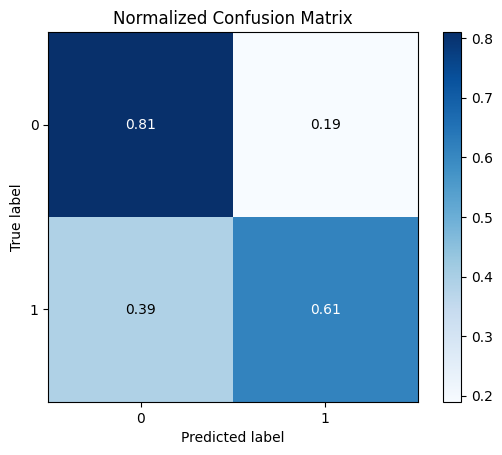

In [107]:
from sklearn.model_selection import cross_val_predict
class_names = ['Outcome']
y_pred= vot_hard.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

# ROC Curve

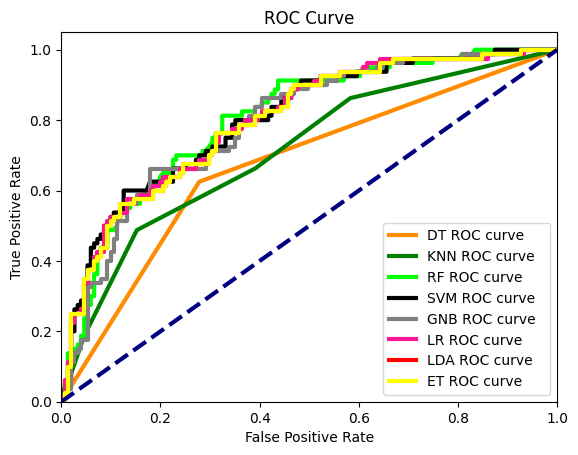

In [109]:
from sklearn.metrics import roc_curve

y_pred_probDT = DT.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_probDT)

roc_auc = auc(fpr, tpr)

y_pred_probKNN = knn.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold = roc_curve(y_test, y_pred_probKNN)

roc_auc1 = auc(fpr1, tpr1)

y_pred_probRF = RF.predict_proba(X_test)[:,1]
fpr2, tpr2, threshold = roc_curve(y_test, y_pred_probRF)

roc_auc2 = auc(fpr2, tpr2)

y_pred_probsvm = svclassifier.predict_proba(X_test )[:,1]
fpr3, tpr3, threshold = roc_curve(y_test, y_pred_probsvm)

roc_auc3 = auc(fpr3, tpr3)

y_pred_probGNB = GNB.predict_proba(X_test)[:,1]
fpr4, tpr4, threshold = roc_curve(y_test, y_pred_probGNB)

roc_auc4 = auc(fpr4, tpr4)

y_pred_probLR = LR.predict_proba(X_test)[:,1]
fpr5, tpr5, threshold = roc_curve(y_test, y_pred_probLR)

roc_auc5 = auc(fpr5, tpr5)

y_pred_probLDA = LDA.predict_proba(X_test)[:,1]
fpr6, tpr6, threshold = roc_curve(y_test, y_pred_probLDA)

roc_auc6 = auc(fpr6, tpr6)

y_pred_probET = ExtraTree.predict_proba(X_test)[:,1]
fpr7, tpr7, threshold = roc_curve(y_test, y_pred_probLDA)

roc_auc6 = auc(fpr7, tpr7)

lw = 3
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='DT ROC curve')
plt.plot(fpr1, tpr1, color='green', lw=3, label='KNN ROC curve  ')
plt.plot(fpr2, tpr2, color='lime', lw=3, label='RF ROC curve  ')
plt.plot(fpr3, tpr3, color='black', lw=3, label='SVM ROC curve  ')
plt.plot(fpr4, tpr4, color='gray', lw=3, label='GNB ROC curve  ')
plt.plot(fpr5, tpr5, color='deeppink', lw=3, label='LR ROC curve  ')
plt.plot(fpr6, tpr6, color='red', lw=3, label='LDA ROC curve  ')
plt.plot(fpr7, tpr7, color='yellow', lw=3, label='ET ROC curve  ')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")